In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime

from tensorflow.keras.layers import LSTM,GRU,RNN,Dense,Input,Dropout
from tensorflow.keras.models import Model,save_model

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df_10= pd.read_csv('nse_10yrs.csv')

In [3]:
dates=[]
for i in range(len(df_10)):
    dates.append(datetime.strptime(df_10['Date'][i],"%d-%m-%Y"))

In [4]:
dates=pd.DataFrame({'dates':dates})

In [5]:
df_10= pd.concat([df_10,dates],axis='columns',copy='False')

In [6]:
df_10

,Date,Open,High,Low,Close,Adj Close,Volume,dates
0,01-02-2010,4882.049805,4918.799805,4827.149902,4899.700195,4899.700195,0.0,2010-02-01
1,02-02-2010,4907.850098,4951.149902,4814.100098,4830.100098,4830.100098,0.0,2010-02-02
2,03-02-2010,4831.000000,4949.149902,4831.000000,4931.850098,4931.850098,0.0,2010-02-03
3,04-02-2010,4931.299805,4931.299805,4832.350098,4845.350098,4845.350098,0.0,2010-02-04
4,05-02-2010,4819.649902,4827.000000,4692.350098,4718.649902,4718.649902,0.0,2010-02-05
...,...,...,...,...,...,...,...,...
2468,27-01-2020,12197.099610,12216.599610,12107.000000,12119.000000,12119.000000,441200.0,2020-01-27
2469,28-01-2020,12148.099610,12163.549810,12024.500000,12055.799810,12055.799810,478500.0,2020-01-28
2470,29-01-2020,12114.900390,12169.599610,12103.799810,12129.500000,12129.500000,514400.0,2020-01-29
2471,30-01-2020,12147.750000,12150.299810,12010.599610,12035.799810,12035.799810,538100.0,2020-01-30


In [7]:
df_10['dates']=pd.to_datetime(df_10['dates'])
df_10=df_10.set_index('dates')
df_10

,Date,Open,High,Low,Close,Adj Close,Volume
dates,,,,,,,
2010-02-01,01-02-2010,4882.049805,4918.799805,4827.149902,4899.700195,4899.700195,0.0
2010-02-02,02-02-2010,4907.850098,4951.149902,4814.100098,4830.100098,4830.100098,0.0
2010-02-03,03-02-2010,4831.000000,4949.149902,4831.000000,4931.850098,4931.850098,0.0
2010-02-04,04-02-2010,4931.299805,4931.299805,4832.350098,4845.350098,4845.350098,0.0
2010-02-05,05-02-2010,4819.649902,4827.000000,4692.350098,4718.649902,4718.649902,0.0
...,...,...,...,...,...,...,...
2020-01-27,27-01-2020,12197.099610,12216.599610,12107.000000,12119.000000,12119.000000,441200.0
2020-01-28,28-01-2020,12148.099610,12163.549810,12024.500000,12055.799810,12055.799810,478500.0
2020-01-29,29-01-2020,12114.900390,12169.599610,12103.799810,12129.500000,12129.500000,514400.0


In [8]:
df_10.isnull().sum()

Date          0
Open         24
High         24
Low          24
Close        24
Adj Close    24
Volume       24
dtype: int64

In [9]:
df_10=df_10.dropna(axis="rows")

In [10]:
df_10.isnull().sum()
df_10.shape

(2449, 7)

In [11]:
df_close=df_10.iloc[:,4]
df_close

dates
2010-02-01     4899.700195
2010-02-02     4830.100098
2010-02-03     4931.850098
2010-02-04     4845.350098
2010-02-05     4718.649902
                  ...     
2020-01-27    12119.000000
2020-01-28    12055.799810
2020-01-29    12129.500000
2020-01-30    12035.799810
2020-01-31    11962.099610
Name: Close, Length: 2449, dtype: float64

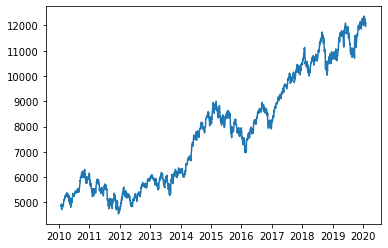

In [12]:
plt.plot(df_close)

In [13]:
sc=StandardScaler()
scaler = MinMaxScaler(feature_range=(-1,1))

df_close_scaled= sc.fit_transform(df_close.values.reshape(-1, 1))

df_closed_minmax= scaler.fit_transform(df_close.values.reshape(-1,1))

In [14]:
df_closed_minmax

array([[-0.90905718],
       [-0.92686205],
       [-0.9008327 ],
       ...,
       [ 0.94044593],
       [ 0.91647587],
       [ 0.89762213]])

In [15]:
df_close_scaled

array([[-1.30396946],
       [-1.33510382],
       [-1.28958777],
       ...,
       [ 1.93015281],
       [ 1.8882377 ],
       [ 1.85526923]])

In [16]:
df_train=df_close_scaled[0:2000]
df_test= df_close_scaled[2000:]

In [17]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [18]:
X_train,y_train=create_dataset(df_train,df_train,time_steps=50)
X_test,y_test=create_dataset(df_test,df_test,time_steps=50)

In [19]:
X_train.shape , y_train.shape

((1950, 50, 1), (1950, 1))

In [20]:
#model 

input_layer = Input(shape=(50,1))
x= LSTM(200)(input_layer)
x= Dropout(0.2)(x)
#x=Dense(64,activation="relu")(x)
prediction=Dense(1,activation='relu')(x)

model1=Model(inputs=input_layer, outputs= prediction)

model1.compile(
    optimizer="adam",
    loss="mse",
    metrics='mae'
)

model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [21]:
hist= model1.fit(X_train,y_train, epochs=25)

Epoch 1/25
61/61 [==============================] - 3s 46ms/step - loss: 0.5321 - mae: 0.5586
Epoch 2/25
61/61 [==============================] - 3s 48ms/step - loss: 0.5184 - mae: 0.5362
Epoch 3/25
61/61 [==============================] - 3s 46ms/step - loss: 0.5181 - mae: 0.5347
Epoch 4/25
61/61 [==============================] - 3s 50ms/step - loss: 0.5181 - mae: 0.5350
Epoch 5/25
61/61 [==============================] - 3s 53ms/step - loss: 0.5182 - mae: 0.5350
Epoch 6/25
61/61 [==============================] - 3s 47ms/step - loss: 0.5180 - mae: 0.5341
Epoch 7/25
61/61 [==============================] - 3s 48ms/step - loss: 0.5178 - mae: 0.5329
Epoch 8/25
61/61 [==============================] - 3s 48ms/step - loss: 0.5177 - mae: 0.5326
Epoch 9/25
61/61 [==============================] - 3s 47ms/step - loss: 0.5178 - mae: 0.5327
Epoch 10/25
61/61 [==============================] - 3s 51ms/step - loss: 0.5181 - mae: 0.5345
Epoch 11/25
61/61 [==============================] - 3s 46m

In [81]:
np.save('lstm_hist_mae.npy', hist.history['mae']) 
np.save('lstm_hist_loss.npy', hist.history['loss']) 

In [22]:
y_pred=model1.predict(X_test)

In [23]:
y_pred.shape

(399, 1)

In [24]:
np.sqrt(mean_squared_error(sc.inverse_transform(y_test),sc.inverse_transform(y_pred))),mean_absolute_error(sc.inverse_transform(y_test),sc.inverse_transform(y_pred))

(125.99132143232629, 95.19435284069553)

<function matplotlib.pyplot.show(*args, **kw)>

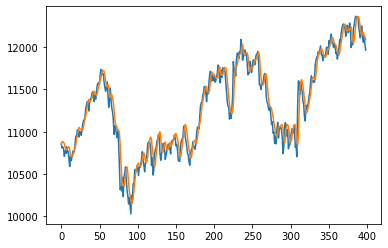

In [25]:
plt.plot(sc.inverse_transform(y_test))
plt.plot(sc.inverse_transform(y_pred))

plt.show

In [26]:
#model2 

input_layer = Input(shape=(50,1))
x= GRU(200)(input_layer)
x= Dropout(0.2)(x)
#x=Dense(64,activation="relu")(x)
prediction=Dense(1,activation='relu')(x)

model2=Model(inputs=input_layer, outputs= prediction)

model2.compile(
    optimizer="adam",
    loss="mse",
    metrics='mae'
)

model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 1)]           0         
_________________________________________________________________
gru (GRU)                    (None, 200)               121800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 122,001
Trainable params: 122,001
Non-trainable params: 0
_________________________________________________________________


In [27]:
hist2= model2.fit(X_train,y_train, epochs=25)

Epoch 1/25
61/61 [==============================] - 2s 37ms/step - loss: 0.5269 - mae: 0.5513
Epoch 2/25
61/61 [==============================] - 2s 39ms/step - loss: 0.5175 - mae: 0.5312
Epoch 3/25
61/61 [==============================] - 3s 43ms/step - loss: 0.5174 - mae: 0.5301
Epoch 4/25
61/61 [==============================] - 3s 42ms/step - loss: 0.5174 - mae: 0.5303
Epoch 5/25
61/61 [==============================] - 3s 44ms/step - loss: 0.5172 - mae: 0.5290: 0s - 
Epoch 6/25
61/61 [==============================] - 3s 42ms/step - loss: 0.5174 - mae: 0.5298
Epoch 7/25
61/61 [==============================] - 4s 58ms/step - loss: 0.5173 - mae: 0.5296
Epoch 8/25
61/61 [==============================] - 3s 48ms/step - loss: 0.5171 - mae: 0.5282
Epoch 9/25
61/61 [==============================] - 3s 43ms/step - loss: 0.5171 - mae: 0.5280
Epoch 10/25
61/61 [==============================] - 2s 35ms/step - loss: 0.5172 - mae: 0.5288
Epoch 11/25
61/61 [==============================] -

In [83]:
np.save('gru_hist_mae.npy', hist2.history['mae']) 
np.save('gru_hist_loss.npy', hist2.history['loss']) 

In [28]:
y_pred2=model2.predict(X_test)
np.sqrt(mean_squared_error(sc.inverse_transform(y_test),sc.inverse_transform(y_pred2))),mean_absolute_error(sc.inverse_transform(y_test),sc.inverse_transform(y_pred2))

(141.46966805936654, 115.9021006868731)

<function matplotlib.pyplot.show(*args, **kw)>

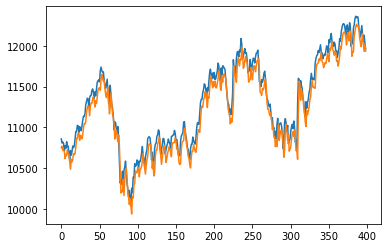

In [29]:
plt.plot(sc.inverse_transform(y_test))
plt.plot(sc.inverse_transform(y_pred2))

plt.show

In [30]:
df_10.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2.449000e+03
mean,7820.527566,7858.771546,7770.404568,7814.691449,7814.691449,1.649500e+05
std,2239.514074,2241.753204,2230.704882,2235.931644,2235.931644,1.638648e+05
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000e+00
25%,5704.700195,5730.500000,5663.600098,5697.700195,5697.700195,0.000000e+00
50%,7828.899902,7877.500000,7772.149902,7830.600098,7830.600098,1.549000e+05
75%,9872.849609,9895.400391,9813.000000,9859.500000,9859.500000,2.195000e+05
max,12430.500000,12430.500000,12321.400390,12362.299810,12362.299810,1.414800e+06


In [31]:
y_pred_scaled= sc.inverse_transform(y_pred2)

In [47]:
y_pred_scaled = y_pred_scaled.reshape(399)

preds=[]

for i in range(len(y_pred_scaled)):
    preds.append(y_pred_scaled[i])

In [65]:
index = dates[-399:].values
index=index.reshape(399)
df_preds= pd.DataFrame({'preds':preds})
index_df= pd.DataFrame({'dates':index})

df_pred=pd.concat([df_preds,index_df],copy=False,axis='columns')

In [67]:
df_pred=df_pred.set_index('dates')
df_pred

,preds
dates,
2018-06-15,10749.052734
2018-06-18,10767.470703
2018-06-19,10714.447266
2018-06-20,10716.439453
2018-06-21,10704.143555
...,...
2020-01-27,12151.759766
2020-01-28,12014.873047
2020-01-29,11931.374023


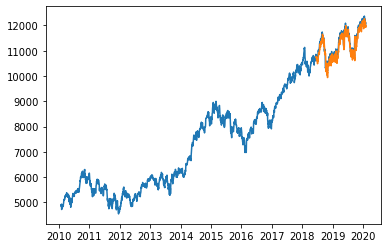

In [69]:
plt.plot(df_close)
plt.plot(df_pred)

In [62]:
idex_df

,dates
0,2018-06-15
1,2018-06-18
2,2018-06-19
3,2018-06-20
4,2018-06-21
...,...
394,2020-01-27
395,2020-01-28
396,2020-01-29
397,2020-01-30


In [38]:
"""model2.save('gru_model')
model1.save('lstm_model')"""

"model2.save('gru_model')\nmodel1.save('lstm_model')"

In [37]:
"""model2.save('gru_model.h5')
model1.save('lstm_model.h5')"""

"model2.save('gru_model.h5')\nmodel1.save('lstm_model.h5')"